# Assignment 1

## *How can we control the increasing number of accidents in New York?*

In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

<h2>Introduction</h2>

<p><strong>Business Context.</strong> The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). </p>
<p>The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. They have certain parameters like borough, time of day, reason for accident, etc. Which they care about and which they would like to get specific information on.</p>

<p><strong>Business Problem.</strong> Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.</p>

<p><strong>Analytical Context.</strong> You are given a CSV file (stored in the already created <code>data</code> folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is <code>;</code> instead of the default <code>,</code>. You will be performing the following tasks on the data:</p>
<ol>
<li>Extract additional borough data stored in a JSON file</li>
<li>Read, transform, and prepare data for visualization</li>
<li>Perform analytics and construct visualizations of the data to identify patterns in the dataset</li>
</ol>
<p>The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:</p>
<ol>
<li>How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?</li>
<li>For any particular day, during which hours are accidents most likely to occur?</li>
<li>Are there more accidents on weekdays than weekends?</li>
<li>What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?</li>
<li>For each borough, during which hours are accidents most likely to occur?</li>
<li>What are the top 5 causes of accidents in the city? </li>
<li>What types of vehicles are most involved in accidents per borough?</li>
<li>What types of vehicles are most involved in deaths?</li>
</ol>

<h2>Fetching the relevant data</h2>

<p>The client has requested analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the <code>data</code> folder.</p>

<h3>Question :</h3>
<p>Use the function <code>json.load()</code> to load the file <code>borough_data.json</code> as a dictionary.</p>

**Answer.**

In [34]:
file_path = "data/borough_data.json"
with open(file_path, "r") as json_file:
    # Use json.load() to load the JSON data into a dictionary
    borough_data = json.load(json_file)

<h3>Question :</h3>
<p>Similarly, use the pandas function <code>read_csv()</code> to load the file <code>accidents.csv</code> as a DataFrame. Name this DataFrame <code>df</code>. </p>

**Answer.**

In [35]:
csv_file_path = "data/accidents.csv"
# Use read_csv() to load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path, sep=';')

<h2>Overview of the data</h2>

<p>Let's go through the columns present in the dataframe:</p>

In [36]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

<p>We have the following columns</p>
<ol>
<li><strong>BOROUGH</strong>: The borough in which the accident occured</li>
<li><strong>COLLISION_ID</strong>: A unique identifier for this collision</li>
<li><strong>CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)</strong>: Reasons for the accident</li>
<li><strong>CROSS STREET NAME</strong>: Nearest cross street to the place of accidents</li>
<li><strong>DATE</strong>: Date of the accident</li>
<li><strong>TIME</strong>: Time of accident</li>
<li><strong>LATITUDE</strong>: Latitude of the accident</li>
<li><strong>LONGITUDE</strong>: Longitude of the accident</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED</strong>: Category wise injury</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED</strong>: Category wise death</li>
<li><strong>ON STREET NAME</strong>: Street where the accident occured</li>
<li><strong>VEHICLE TYPE CODE (1, 2, 3, 4, 5)</strong>: Types of vehicles involved in the accident</li>
<li><strong>ZIP CODE</strong>: zip code of the accident location</li>
</ol>

<h3>Exercise 1 :</h3>
<p>Since 2014, New York City has been implementing a road safety plan named <a href="https://www1.nyc.gov/content/visionzero/pages/">Vision Zero</a>. It aims to reduce the number of traffic deaths to <em>zero</em> by the end of 2024. The plan is creating new and enhancing current safety measures, some of these include:</p>
<ul>
<li>[ ] Automated pedestrian detection</li>
<li>[x] Road safety audits at high risk locations</li>
<li>[ ] Expansion in the cycle track network</li>
<li>[x] Targeted education and awareness initiatives</li>
<li>[x] Creation of pedestrian refuge islands</li>
<li>[x] Launch Integrated Data-Driven Speed Reducer Program (speed humps &amp; speed cushions)</li>
</ul>
<p>Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.</p>
<p><strong>Note:</strong> You can create check marks by double-clicking this cell and adding an <code>[x]</code> in the corresponding lines. </p>

**Answer.**

-------

<p>Let's go ahead and answer each of the client's questions.</p>

<h2>Answering the client's questions</h2>

<h3>Exercise 2 :</h3>
<p>Group the available data on a monthly basis and generate a line plot of accidents over time. Has the number of accidents increased over the past year and a half?</p>
<p><strong>Hint</strong>: You may find the pandas functions <code>to_datetime()</code> and <code>dt.to_period()</code> useful.</p>

**Answer.**

In [37]:
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [38]:
import pandas as pd

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Create a new column 'YEAR' to extract the year from the 'DATE' column
df['YEAR'] = df['DATE'].dt.year

# Create a new column 'MONTH' to extract the month from the 'DATE' column
df['MONTH'] = df['DATE'].dt.month

# Group the data by 'YEAR' and 'MONTH' and calculate the sum of each numeric column
yearly_monthly_totals = df.groupby(['YEAR', 'MONTH']).agg({
    'NUMBER OF PEDESTRIANS INJURED': 'sum',
    'NUMBER OF PEDESTRIANS KILLED': 'sum',
    'NUMBER OF CYCLIST INJURED': 'sum',
    'NUMBER OF CYCLIST KILLED': 'sum',
    'NUMBER OF MOTORIST INJURED': 'sum',
    'NUMBER OF MOTORIST KILLED': 'sum'
}).reset_index()

# Rename columns for clarity
yearly_monthly_totals.columns = ['YEAR', 'MONTH', 'TOTAL_PEDESTRIANS_INJURED', 'TOTAL_PEDESTRIANS_KILLED',
                          'TOTAL_CYCLISTS_INJURED', 'TOTAL_CYCLISTS_KILLED',
                          'TOTAL_MOTORISTS_INJURED', 'TOTAL_MOTORISTS_KILLED']

# Calculate the total number of accidents for each year and month
yearly_monthly_totals['TOTAL_ACCIDENTS'] = (yearly_monthly_totals['TOTAL_PEDESTRIANS_INJURED'] +
                                      yearly_monthly_totals['TOTAL_PEDESTRIANS_KILLED'] +
                                      yearly_monthly_totals['TOTAL_CYCLISTS_INJURED'] +
                                      yearly_monthly_totals['TOTAL_CYCLISTS_KILLED'] +
                                      yearly_monthly_totals['TOTAL_MOTORISTS_INJURED'] +
                                      yearly_monthly_totals['TOTAL_MOTORISTS_KILLED'])

# Print the yearly and monthly totals
yearly_monthly_totals

,YEAR,MONTH,TOTAL_PEDESTRIANS_INJURED,TOTAL_PEDESTRIANS_KILLED,TOTAL_CYCLISTS_INJURED,TOTAL_CYCLISTS_KILLED,TOTAL_MOTORISTS_INJURED,TOTAL_MOTORISTS_KILLED,TOTAL_ACCIDENTS
0,2018,1,770,4,159,1,1758,3,2695
1,2018,2,705,7,147,0,1571,4,2434
2,2018,3,722,6,182,0,1950,4,2864
3,2018,4,584,3,231,2,1964,5,2789
4,2018,5,642,5,336,0,2386,3,3372
5,2018,6,607,8,369,1,2392,7,3384
6,2018,7,549,8,403,1,2354,4,3319
7,2018,8,541,2,449,0,2362,6,3360
8,2018,9,596,8,389,1,2259,4,3257
9,2018,10,729,4,340,0,2290,7,3370


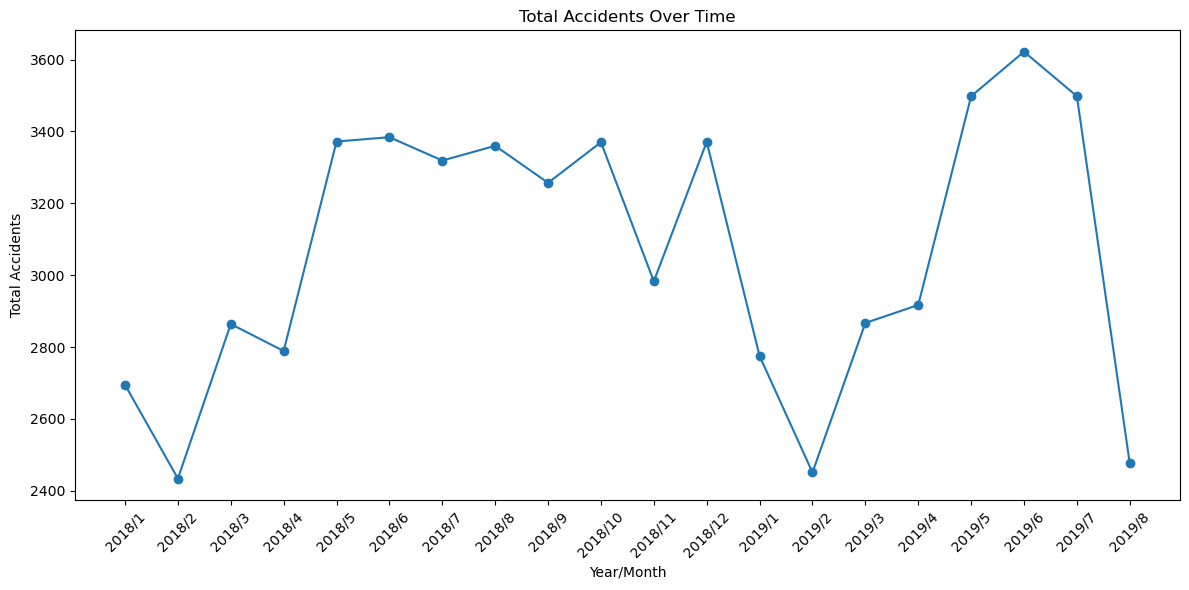

In [39]:
# Create a new column 'YEAR_MONTH' to combine year and month for labeling the x-axis
yearly_monthly_totals['YEAR_MONTH'] = yearly_monthly_totals['YEAR'].astype(str) + '/' + yearly_monthly_totals['MONTH'].astype(str)

# Plot the data
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(yearly_monthly_totals['YEAR_MONTH'], yearly_monthly_totals['TOTAL_ACCIDENTS'], marker='o', linestyle='-')
plt.xlabel('Year/Month')
plt.ylabel('Total Accidents')
plt.title('Total Accidents Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

<h3>Exercise 3 :</h3>
<p>From the plot above, which months seem to have the least number of accidents? What do you think are the reasons behind this?</p>

**Answer.**

<p>February-2018, and February-2019 are the months with the fewest accidents, there could be several reasons why that is. 
<ul> 
<li>Firstly, Feb is the shortest month of the year so less days for accidents to occur.
<li>Secondly, Feb is the middle of winter, with the heaviest snowfall meaning no cyclists or motorists on the roads, probably less pedestrians as well.
<li>Thirdly, days are shorter so people are staying inside longer, fewer people walking outside means fewer accidents occuring.

<h3>Exercise 4 :</h3>
<p>How does the number of accidents vary throughout a single day? Create a new column <code>HOUR</code> based on the data from the <code>TIME</code> column, then plot a bar graph of the distribution per hour throughout the day.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.hour</code> useful. </p>

**Answer.**

In [40]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'YEAR', 'MONTH'],
      dtype='object')

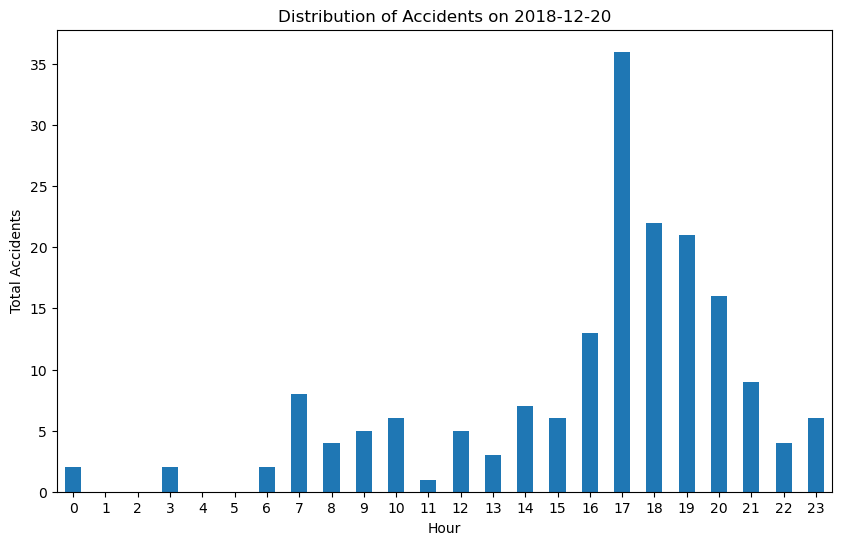

In [41]:
# Calculate the total accidents for each day
df['TOTAL_ACCIDENTS'] = (df['NUMBER OF PEDESTRIANS INJURED'] +
                         df['NUMBER OF PEDESTRIANS KILLED'] +
                         df['NUMBER OF CYCLIST INJURED'] +
                         df['NUMBER OF CYCLIST KILLED'] +
                         df['NUMBER OF MOTORIST INJURED'] +
                         df['NUMBER OF MOTORIST KILLED'])

# Create a new column 'HOUR' based on the 'TIME' column
df['HOUR'] = pd.to_datetime(df['TIME']).dt.hour

# Find the day with the greatest number of total accidents
day_with_most_accidents = df.groupby(df['DATE'].dt.date)['TOTAL_ACCIDENTS'].sum().idxmax()

# Filter the DataFrame for the day with the most accidents
selected_day_data = df[df['DATE'].dt.date == day_with_most_accidents]

# Plot a bar graph of the distribution of accidents per hour throughout the day
plt.figure(figsize=(10, 6))
hourly_distribution = selected_day_data.groupby('HOUR')['TOTAL_ACCIDENTS'].sum()
hourly_distribution.plot(kind='bar', rot=0)
plt.xlabel('Hour')
plt.ylabel('Total Accidents')
plt.title(f'Distribution of Accidents on {day_with_most_accidents}')
plt.show()


<p>From this, we see that more accidents occur in the afternoon (2 - 6 PM) than at other times of day.</p>

<h3>Exercise 5 :</h3>
<p>In the above question we have aggregated the number accidents per hour disregarding the date and place of ocurrence. Which criticism would you give to this approach?</p>

**Answer.**

<p>I think taking into account the location matters, because if we're going to add pedestrian refuge islands we need to know the intersection where the accidents are occuring. I don't think the date is as important because no matter the date the trend will remain.

<h3>Exercise 6 :</h3>
<p>How does the number of accidents vary throughout a single week? Plot a bar graph based on the accidents count by day of the week.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.weekday</code> useful.</p>

**Answer.**

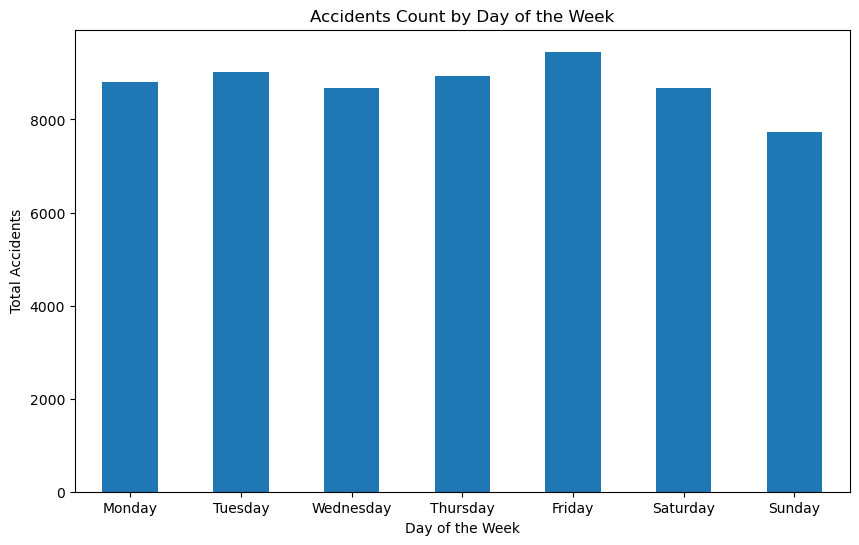

In [42]:
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday

# Define the day names for labeling the x-axis
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the accident count for each day of the week
weekly_distribution = df.groupby('DAY_OF_WEEK')['TOTAL_ACCIDENTS'].sum()

# Plot a bar graph based on the accidents count by day of the week
plt.figure(figsize=(10, 6))
weekly_distribution.index = [day_names[i] for i in weekly_distribution.index]  # Replace numerical index with day names
weekly_distribution.plot(kind='bar', rot=0)
plt.xlabel('Day of the Week')
plt.ylabel('Total Accidents')
plt.title('Accidents Count by Day of the Week')
plt.show()

<h3>Exercise 7 :</h3>
<p>Plot a bar graph of the total number of accidents in each borough, as well as one of the accidents per square mile per borough. What can you conclude?</p>
<p><strong>Hint:</strong> You may want to update some of the keys in the borough dictionary to match the names in the dataframe. </p>

**Answer.**

In [50]:
print(df['BOROUGH'].unique())

['BRONX' 'BROOKLYN' 'QUEENS' 'MANHATTAN' 'STATEN ISLAND']


In [51]:
print(borough_data)

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1}, 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82}, 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83}, 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53}, 'staten island': {'name': 'staten island', 'population': 479458.0, 'area': 58.37}}


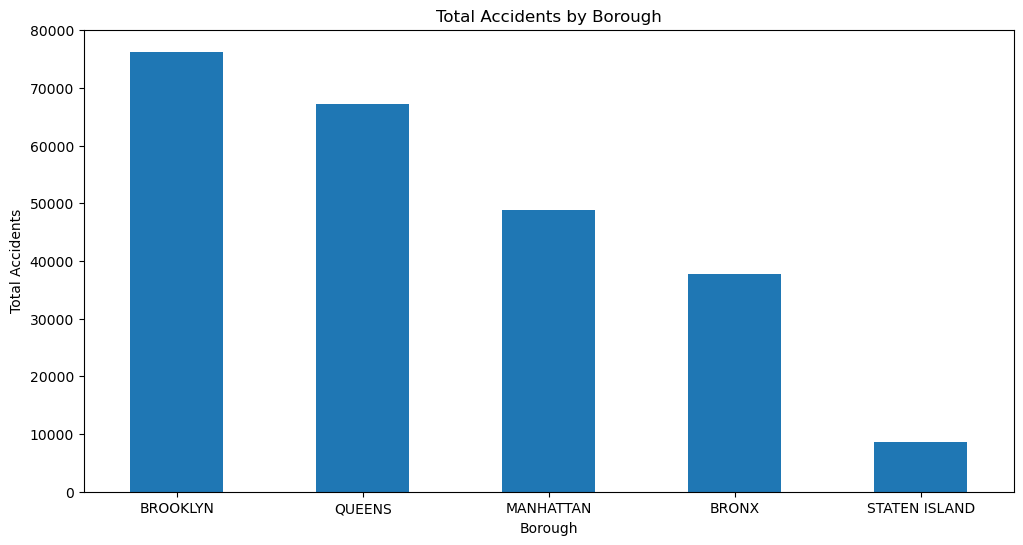

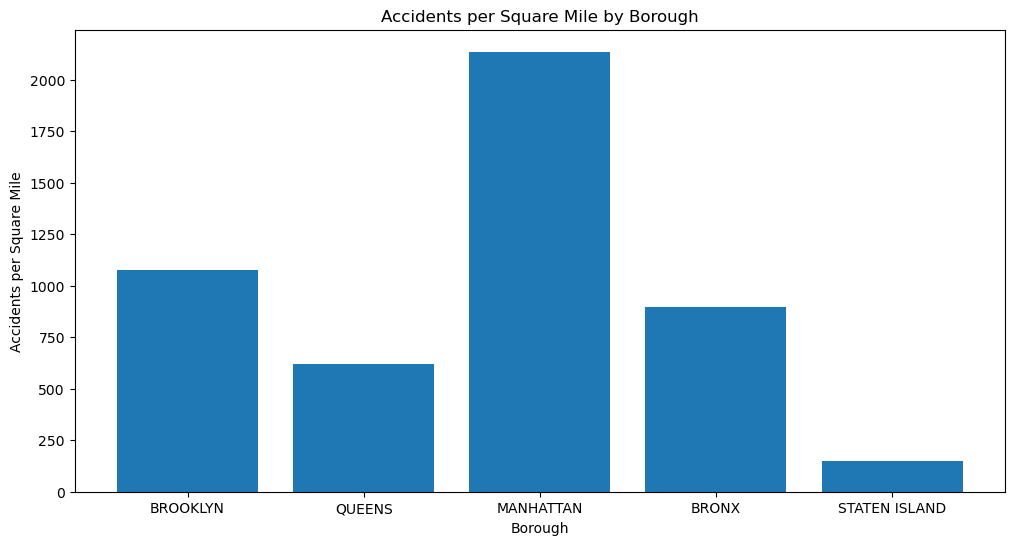

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the 'df' DataFrame and 'borough_data' dictionary

# Update keys in the 'borough_data' dictionary to match DataFrame column names
borough_data = {
    'BRONX': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
    'BROOKLYN': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
    'MANHATTAN': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
    'QUEENS': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
    'STATEN ISLAND': {'name': 'staten island', 'population': 479458.0, 'area': 58.37}
}

# Calculate the total number of accidents in each borough
total_accidents_by_borough = df['BOROUGH'].value_counts()

# Calculate accidents per square mile for each borough
accidents_per_square_mile = {
    borough: total_accidents / borough_data[borough]['area']
    for borough, total_accidents in total_accidents_by_borough.items()
}

# Plot a bar graph of the total number of accidents in each borough
plt.figure(figsize=(12, 6))
total_accidents_by_borough.plot(kind='bar', rot=0)
plt.xlabel('Borough')
plt.ylabel('Total Accidents')
plt.title('Total Accidents by Borough')
plt.show()

# Plot a bar graph of accidents per square mile per borough
plt.figure(figsize=(12, 6))
plt.bar(accidents_per_square_mile.keys(), accidents_per_square_mile.values())
plt.xlabel('Borough')
plt.ylabel('Accidents per Square Mile')
plt.title('Accidents per Square Mile by Borough')
plt.show()


<h3>Exercise 8 :</h3>
<p>Which hours have the most accidents for each borough? Plot a bar graph for each borough showing the number of accidents for each hour of the day.</p>
<p><strong>Hint:</strong> You can use <code>sns.FacetGrid</code> to create a grid of plots with the hourly data of each borough. </p>

**Answer.**

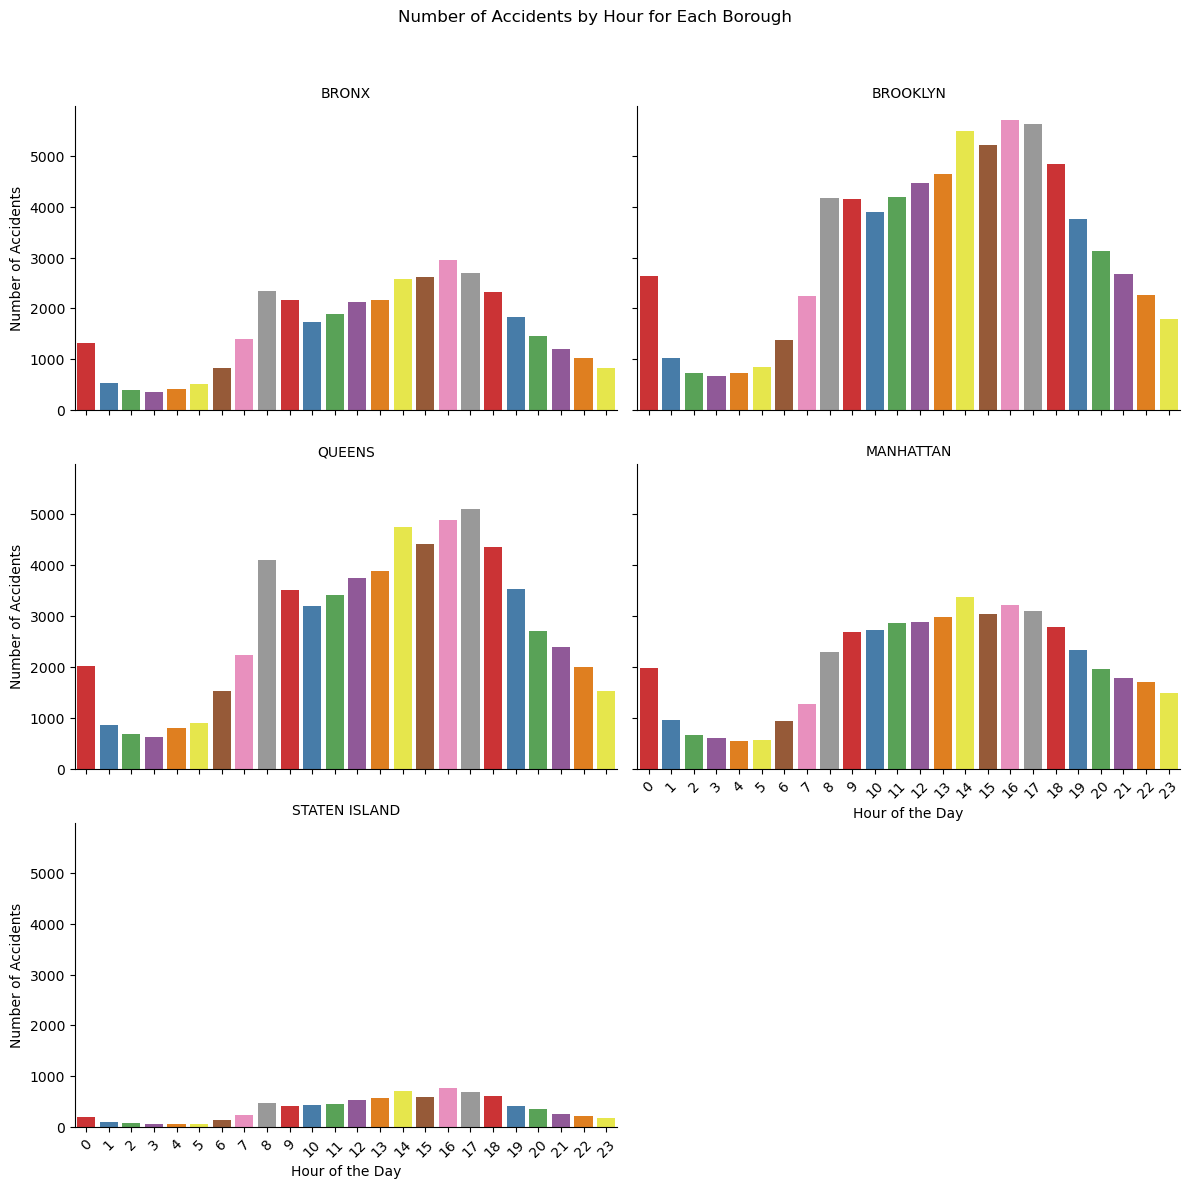

In [54]:
# Create a new column 'HOUR' based on the 'TIME' column
df['HOUR'] = pd.to_datetime(df['TIME']).dt.hour

# Define the order of hours for sorting in plots
hour_order = list(range(24))

# Create a FacetGrid to create a grid of plots for each borough
g = sns.FacetGrid(df, col='BOROUGH', col_wrap=2, height=4, aspect=1.5)
g.map(sns.countplot, 'HOUR', order=hour_order, palette='Set1')
g.set_axis_labels('Hour of the Day', 'Number of Accidents')
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Number of Accidents by Hour for Each Borough')
plt.show()


<p><strong>Is the number of accidents higher at different times in different boroughs? Should we concentrate at different times for each borough?</strong></p>

<p>We can see that in all the boroughs the accident count is highest from approximately 2 - 6PM. But in Manhattan and the Bronx, you can see that there is not as much of a relative increase during these hours as in Brooklyn or Queens. Additionally, Staten Island has the lowest overall number of accidents.</p>

<h3>Exercise 9 :</h3>
<p>What factors cause the most accidents? Avoid double counting the contributing factors of a single accident. </p>
<p><strong>Hint:</strong> One way of dealing with repetitions is to concatenate the corresponding columns while preserving their indexes, you can do that with the functions <code>pd.concat()</code> and  <code>reset_index()</code>. Then, use an appropiate <code>group_by</code> to count the number of repetitions of contributed factors per accident.   </p>

**Answer.**

In [59]:
# Concatenate the contributing factor columns while preserving their indexes
contributing_factors = pd.concat([
    df['CONTRIBUTING FACTOR VEHICLE 1'],
    df['CONTRIBUTING FACTOR VEHICLE 2'],
    df['CONTRIBUTING FACTOR VEHICLE 3'],
    df['CONTRIBUTING FACTOR VEHICLE 4'],
    df['CONTRIBUTING FACTOR VEHICLE 5']
], axis=0)

# Reset the index to have a single column of contributing factors
contributing_factors = contributing_factors.reset_index(drop=True)

# Count the number of repetitions of contributing factors per accident
factor_counts = contributing_factors.value_counts()

# Display the top contributing factors
print("Top Contributing Factors to Accidents:")
print(factor_counts)

Top Contributing Factors to Accidents:
Unspecified                                              240164
Driver Inattention/Distraction                            72203
Failure to Yield Right-of-Way                             20413
Following Too Closely                                     17909
Backing Unsafely                                          15068
Passing Too Closely                                       13378
Passing or Lane Usage Improper                            12953
Other Vehicular                                           11093
Unsafe Lane Changing                                       6986
Turning Improperly                                         6798
Traffic Control Disregarded                                5146
Driver Inexperience                                        4431
Unsafe Speed                                               3530
Reaction to Uninvolved Vehicle                             3190
View Obstructed/Limited                                    2537
A

<h3>Exercise 10 :</h3>
<p>Which vehicle types are most involved in accidents per borough? Avoid double counting the type of vehicles present in a single accident. </p>
<p><strong>Hint:</strong> You can apply a similar approach to the one used in the previous question.</p>

**Answer.**

In [63]:
# Create separate DataFrames for each contributing vehicle type column
vehicle_type_1 = df[['BOROUGH', 'VEHICLE TYPE CODE 1']].rename(columns={'VEHICLE TYPE CODE 1': 'VEHICLE TYPE'})
vehicle_type_2 = df[['BOROUGH', 'VEHICLE TYPE CODE 2']].rename(columns={'VEHICLE TYPE CODE 2': 'VEHICLE TYPE'})
vehicle_type_3 = df[['BOROUGH', 'VEHICLE TYPE CODE 3']].rename(columns={'VEHICLE TYPE CODE 3': 'VEHICLE TYPE'})
vehicle_type_4 = df[['BOROUGH', 'VEHICLE TYPE CODE 4']].rename(columns={'VEHICLE TYPE CODE 4': 'VEHICLE TYPE'})
vehicle_type_5 = df[['BOROUGH', 'VEHICLE TYPE CODE 5']].rename(columns={'VEHICLE TYPE CODE 5': 'VEHICLE TYPE'})

# Concatenate the individual DataFrames into a single DataFrame
all_vehicle_types = pd.concat([vehicle_type_1, vehicle_type_2, vehicle_type_3, vehicle_type_4, vehicle_type_5], axis=0)

# Drop rows with missing vehicle type values
all_vehicle_types = all_vehicle_types.dropna(subset=['VEHICLE TYPE'])

# Count the number of accidents involving each vehicle type per borough
vehicle_type_counts = all_vehicle_types.groupby(['BOROUGH', 'VEHICLE TYPE']).size().reset_index(name='ACCIDENTS_COUNT')

# Find the vehicle types most involved in accidents per borough
top_vehicle_types_per_borough = vehicle_type_counts.groupby('BOROUGH').apply(lambda x: x.nlargest(5, 'ACCIDENTS_COUNT')).reset_index(drop=True)

# Display the top vehicle types involved in accidents per borough
print("Top Vehicle Types Involved in Accidents per Borough:")
print(top_vehicle_types_per_borough)

Top Vehicle Types Involved in Accidents per Borough:
          BOROUGH                         VEHICLE TYPE  ACCIDENTS_COUNT
0           BRONX                                Sedan            25714
1           BRONX  Station Wagon/Sport Utility Vehicle            19185
2           BRONX                    PASSENGER VEHICLE             6421
3           BRONX        SPORT UTILITY / STATION WAGON             4643
4           BRONX                        Pick-up Truck             1745
5        BROOKLYN                                Sedan            51983
6        BROOKLYN  Station Wagon/Sport Utility Vehicle            40895
7        BROOKLYN                    PASSENGER VEHICLE            13480
8        BROOKLYN        SPORT UTILITY / STATION WAGON            10124
9        BROOKLYN                        Pick-up Truck             3310
10      MANHATTAN                                Sedan            25614
11      MANHATTAN  Station Wagon/Sport Utility Vehicle            19730
12      MAN

<h3>Exercise 11 :</h3>
<p>In a 2018 <a href="https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html">interview</a> with The New York Times, New York's mayor de Blasio stated that <em>'Vision Zero is clearly working'</em>. That year, the number of deaths in traffic accidents in NYC dropped to a historical 202. Yet, as reported by <a href="https://www.amny.com/news/vision-zero-de-blasio-1-30707464/">am New York Metro</a>, the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclist injured has not seen any improvement.</p>
<p>How would you use the provided data to understand what went wrong in the first quarter of 2019?</p>
<blockquote>
<ul>
<li>
<p>[x] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. </p>
</li>
<li>
<p>[x] Create a pair of heatmaps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.    </p>
</li>
<li>
<p>[ ] The provided data is insufficient to improve our understanding of the situation.</p>
</li>
<li>
<p>[ ] None of the above. I would do the following: <em>here your recommended answer</em>.</p>
</li>
</ul>
</blockquote>

**Answer.**

-------

<h3>Exercise 12 :</h3>
<p>Calculate the number of deaths caused by each type of vehicle. Plot a bar chart for the top 5 vehicles. Which vehicles are most often involved in deaths, and by how much more than the others?</p>
<p><strong>For example,</strong> if two people died at an accident where 5 vehicles were involved: 4 are PASSENGER VEHICLE and 1 is a SPORT UTILITY/STATION WAGON. Then, we would add two deaths to each PASSENGER VEHICLE and SPORT UTILITY/STATION WAGON types.</p>
<p><strong>Hint:</strong> You may want to create a new column with the total number of kills in the accident. For that you may find the function <code>.to_numpy()</code> useful. Then, proceed as the previous excercises to avoid double-counting the type of vehicles. </p>

**Answer.**

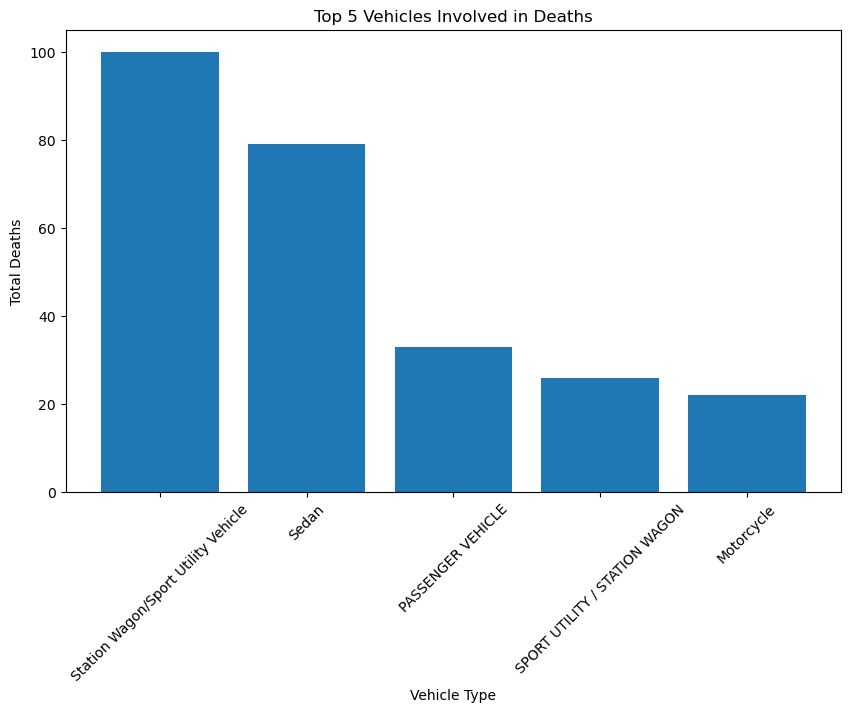

Top 5 Vehicles Involved in Deaths:
                            VEHICLE TYPE  TOTAL DEATHS
405  Station Wagon/Sport Utility Vehicle           100
395                                Sedan            79
318                    PASSENGER VEHICLE            33
381        SPORT UTILITY / STATION WAGON            26
289                           Motorcycle            22


In [64]:
# Create a new column 'TOTAL DEATHS' with the total number of deaths in each accident
death_columns = ['NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']
df['TOTAL DEATHS'] = df[death_columns].to_numpy().sum(axis=1)

# Create separate DataFrames for each contributing vehicle type column and total deaths
vehicle_type_1 = df[['VEHICLE TYPE CODE 1', 'TOTAL DEATHS']].rename(columns={'VEHICLE TYPE CODE 1': 'VEHICLE TYPE'})
vehicle_type_2 = df[['VEHICLE TYPE CODE 2', 'TOTAL DEATHS']].rename(columns={'VEHICLE TYPE CODE 2': 'VEHICLE TYPE'})
vehicle_type_3 = df[['VEHICLE TYPE CODE 3', 'TOTAL DEATHS']].rename(columns={'VEHICLE TYPE CODE 3': 'VEHICLE TYPE'})
vehicle_type_4 = df[['VEHICLE TYPE CODE 4', 'TOTAL DEATHS']].rename(columns={'VEHICLE TYPE CODE 4': 'VEHICLE TYPE'})
vehicle_type_5 = df[['VEHICLE TYPE CODE 5', 'TOTAL DEATHS']].rename(columns={'VEHICLE TYPE CODE 5': 'VEHICLE TYPE'})

# Concatenate the individual DataFrames into a single DataFrame
all_vehicle_types = pd.concat([vehicle_type_1, vehicle_type_2, vehicle_type_3, vehicle_type_4, vehicle_type_5], axis=0)

# Drop rows with missing vehicle type values
all_vehicle_types = all_vehicle_types.dropna(subset=['VEHICLE TYPE'])

# Group by vehicle type and sum the deaths
vehicle_death_counts = all_vehicle_types.groupby('VEHICLE TYPE')['TOTAL DEATHS'].sum().reset_index()

# Find the top 5 vehicles involved in deaths
top_vehicles_deaths = vehicle_death_counts.nlargest(5, 'TOTAL DEATHS')

# Plot a bar chart for the top 5 vehicles
plt.figure(figsize=(10, 6))
plt.bar(top_vehicles_deaths['VEHICLE TYPE'], top_vehicles_deaths['TOTAL DEATHS'])
plt.xlabel('Vehicle Type')
plt.ylabel('Total Deaths')
plt.title('Top 5 Vehicles Involved in Deaths')
plt.xticks(rotation=45)
plt.show()

# Display the top 5 vehicles involved in deaths and their death counts
print("Top 5 Vehicles Involved in Deaths:")
print(top_vehicles_deaths)